2025-06-23 21:06:55.357596: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750712815.599968      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750712815.671578      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


NOTEBOOK 3: MODELING, TRAINING & EVALUATION (20-FILE EXPERIMENT)
Data loaded successfully. Total files: 20
Data generators created successfully.

INITIATING FINAL MODEL TRAINING


I0000 00:00:1750712929.787532      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1750712929.788283      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model created with 456,655 parameters.

Starting final training run...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100


I0000 00:00:1750712951.765833      62 service.cc:148] XLA service 0x7820b4003f50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750712951.767504      62 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1750712951.767525      62 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
W0000 00:00:1750712952.959416      62 assert_op.cc:38] Ignoring Assert operator compile_loss/improved_composite_loss/SSIM/Assert/Assert
W0000 00:00:1750712952.960716      62 assert_op.cc:38] Ignoring Assert operator compile_loss/improved_composite_loss/SSIM/Assert_1/Assert
W0000 00:00:1750712952.961805      62 assert_op.cc:38] Ignoring Assert operator compile_loss/improved_composite_loss/SSIM/Assert_2/Assert
W0000 00:00:1750712952.962488      62 assert_op.cc:38] Ignoring Assert operator compile_loss/improved_composite_loss/SSIM/Assert_3/Assert
W0000 00:00:1750712952.962635      62 assert_op.c

1124/1124 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - loss: 0.2460 - mae: 0.0792 - psnr: 25.0140 - ssim: 0.5872

W0000 00:00:1750713266.124172      61 assert_op.cc:38] Ignoring Assert operator compile_loss/improved_composite_loss/SSIM/Assert/Assert
W0000 00:00:1750713266.125241      61 assert_op.cc:38] Ignoring Assert operator compile_loss/improved_composite_loss/SSIM/Assert_1/Assert
W0000 00:00:1750713266.126271      61 assert_op.cc:38] Ignoring Assert operator compile_loss/improved_composite_loss/SSIM/Assert_2/Assert
W0000 00:00:1750713266.126965      61 assert_op.cc:38] Ignoring Assert operator compile_loss/improved_composite_loss/SSIM/Assert_3/Assert
W0000 00:00:1750713266.127072      61 assert_op.cc:38] Ignoring Assert operator PSNR/Assert/Assert
W0000 00:00:1750713266.127220      61 assert_op.cc:38] Ignoring Assert operator PSNR/Assert_1/Assert
W0000 00:00:1750713266.127397      61 assert_op.cc:38] Ignoring Assert operator SSIM/Assert/Assert
W0000 00:00:1750713266.127585      61 assert_op.cc:38] Ignoring Assert operator SSIM/Assert_1/Assert
W0000 00:00:1750713266.128512      61 assert_op.cc


Epoch 1: val_loss improved from inf to 0.08726, saving model to /kaggle/output/best_denoising_model_20_files.keras
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 373s 295ms/step - loss: 0.2459 - mae: 0.0791 - psnr: 25.0183 - ssim: 0.5873 - val_loss: 0.0873 - val_mae: 0.0128 - val_psnr: 33.4686 - val_ssim: 0.8383 - learning_rate: 1.0000e-04
Epoch 2/100
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 0.0926 - mae: 0.0134 - psnr: 33.2075 - ssim: 0.8281
Epoch 2: val_loss improved from 0.08726 to 0.07701, saving model to /kaggle/output/best_denoising_model_20_files.keras
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 330s 293ms/step - loss: 0.0926 - mae: 0.0134 - psnr: 33.2077 - ssim: 0.8281 - val_loss: 0.0770 - val_mae: 0.0111 - val_psnr: 34.4613 - val_ssim: 0.8571 - learning_rate: 1.0000e-04
Epoch 3/100
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - loss: 0.0832 - mae: 0.0121 - psnr: 33.8960 - ssim: 0.8458
Epoch 3: val_loss improved from 0.07701 to 0.07330, saving model to /kaggle/output/best_denoising_model_20_fi

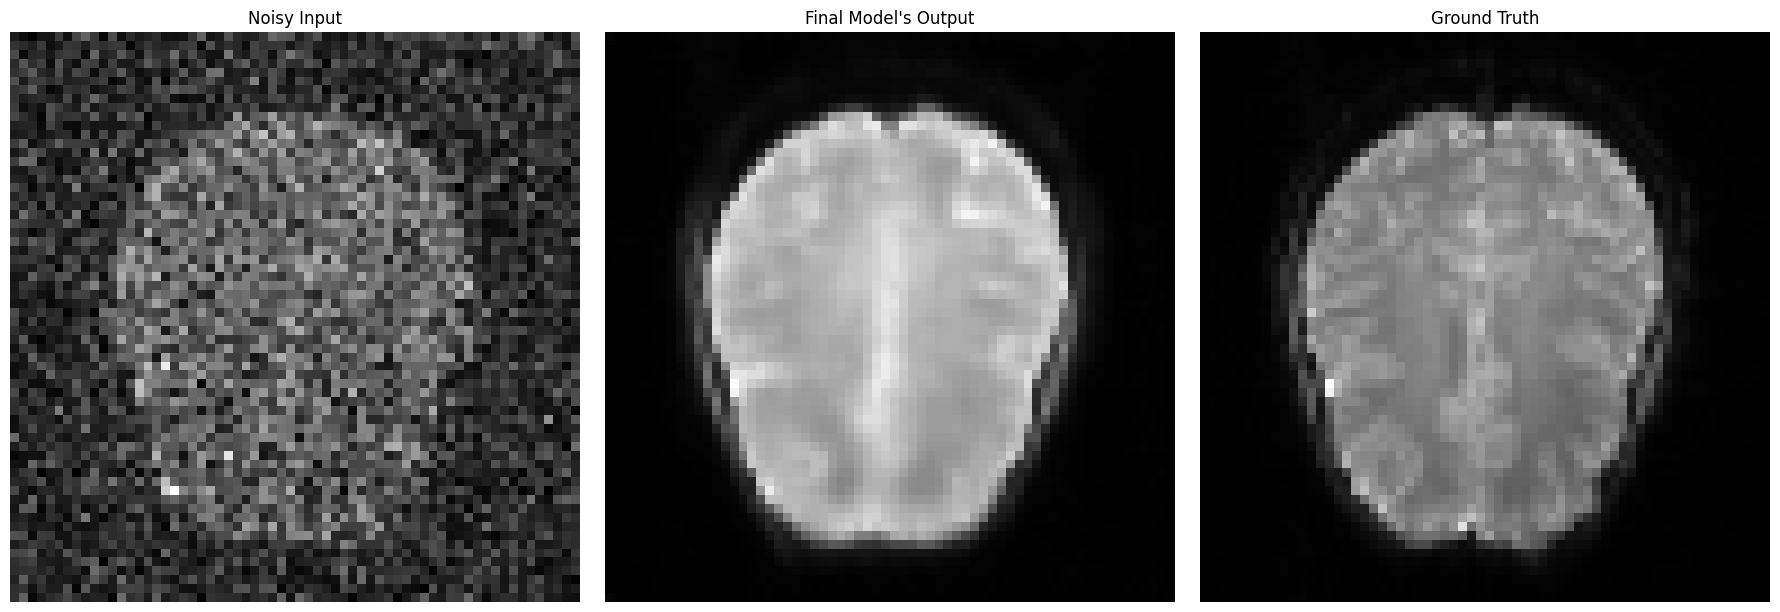


Plotting training history...


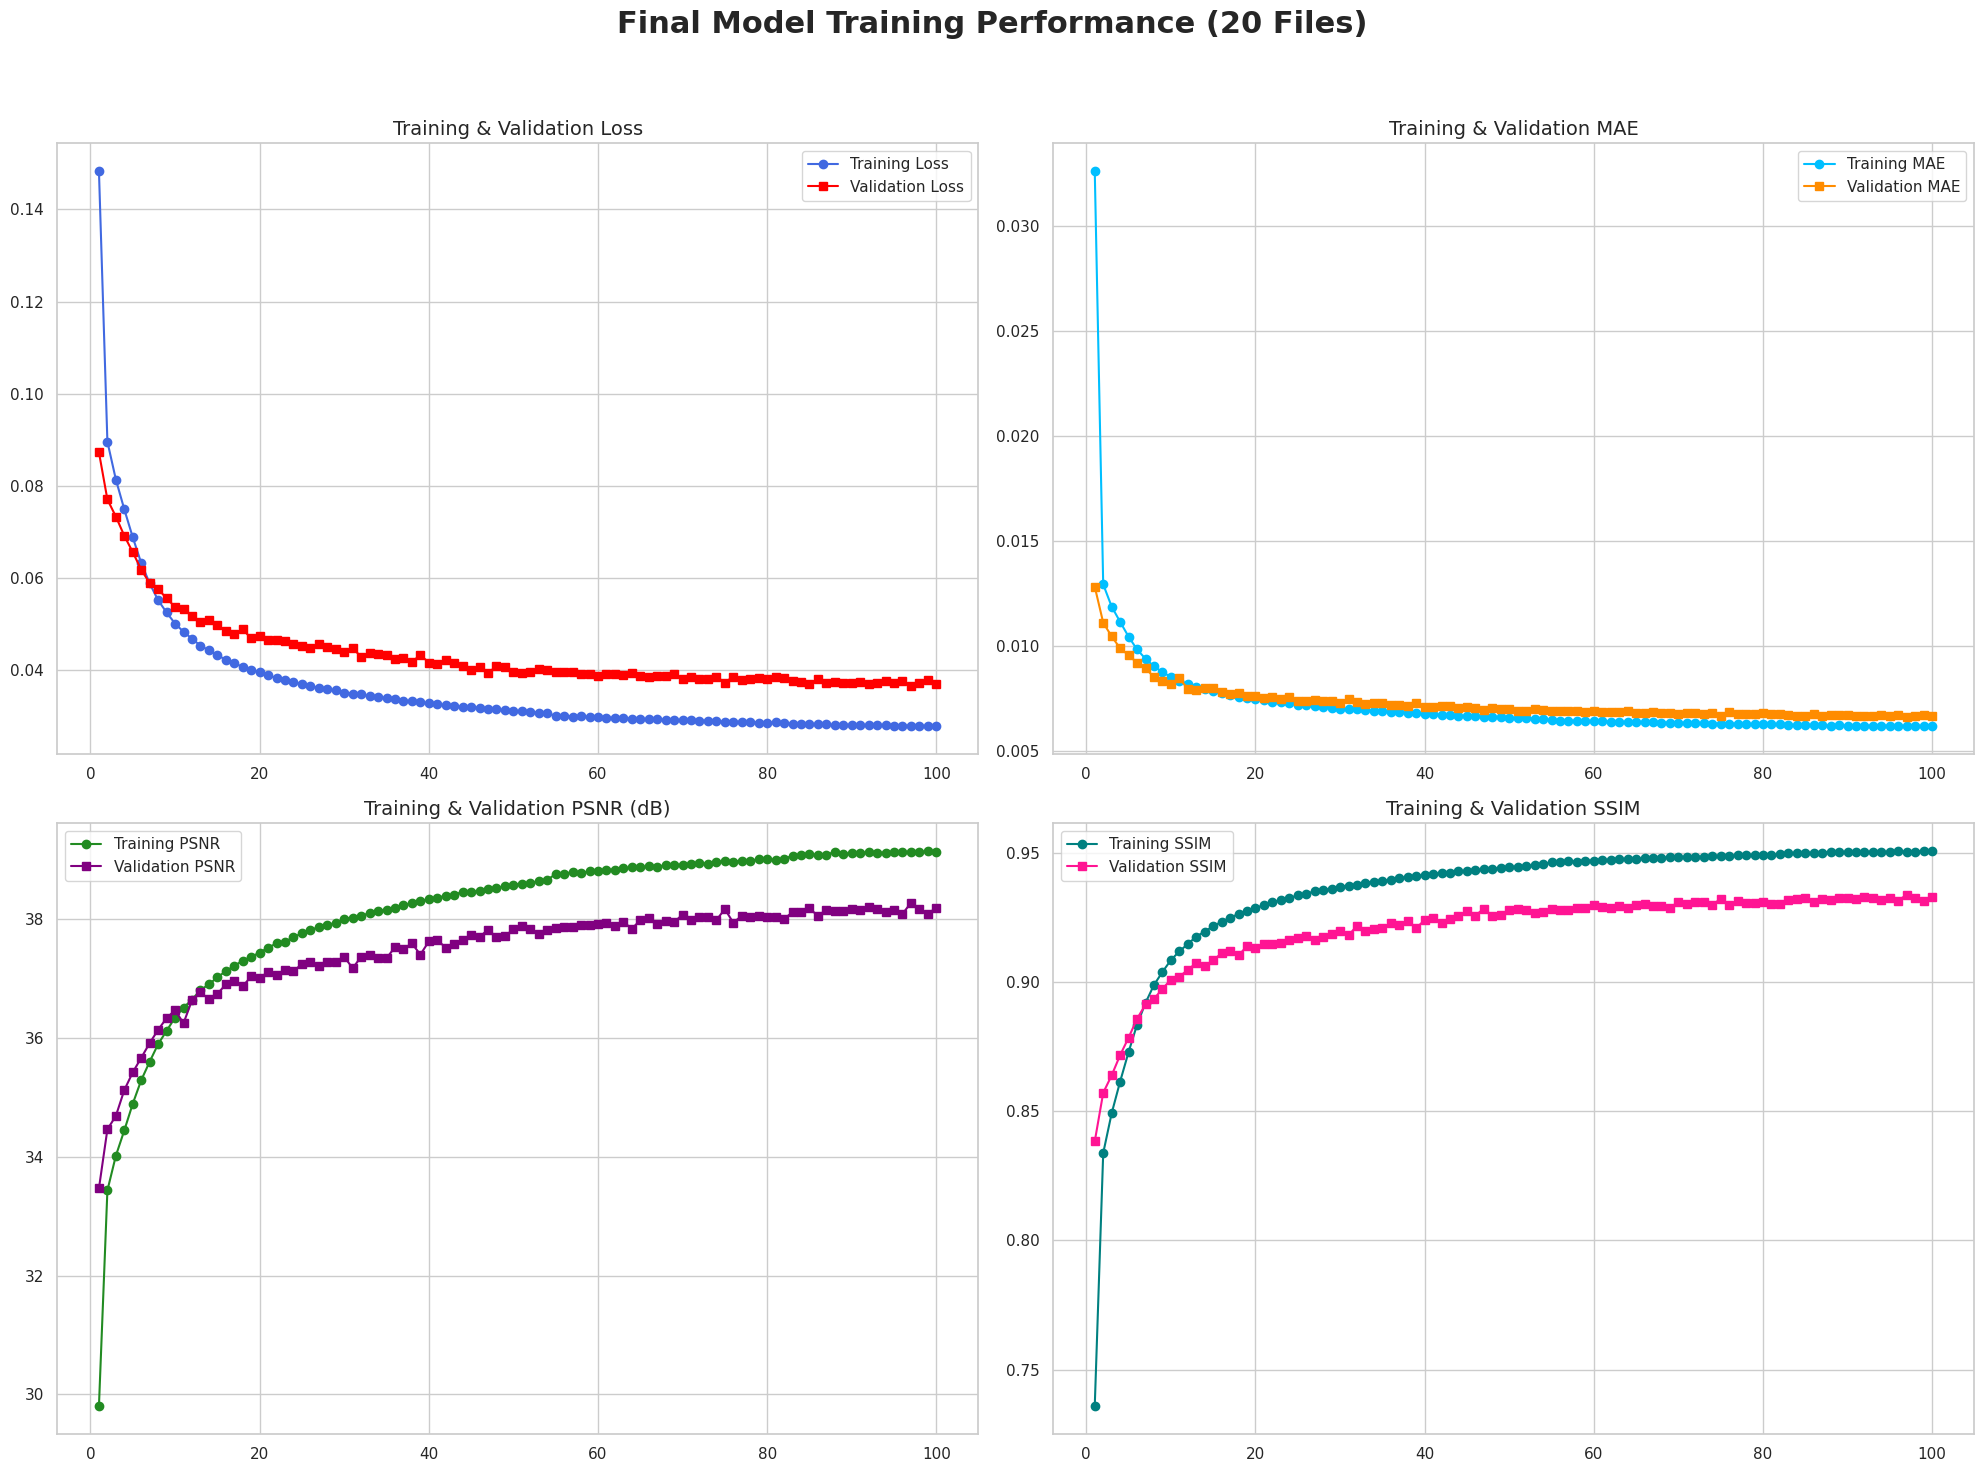


PIPELINE COMPLETE.


In [1]:
import os
import gc
import math
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import zoom
from typing import List

# ===================================================================
#  DATA PREPARATION (LOADING & GENERATOR SETUP)
# This section loads the pre-prepared data and sets up the generators.
# ===================================================================

print("MODEL 3: MODELING, TRAINING & EVALUATION (20-FILE EXPERIMENT)")
print("=" * 60)

# --- Define Helper Classes and Functions ---

class ImprovedFMRIDataGenerator(tf.keras.utils.Sequence):
    """The same improved generator from our most successful model."""
    def __init__(self, data_arrays: List[np.ndarray], batch_size: int = 4, 
                 target_shape: tuple = (64, 64, 48), noise_level: float = 0.1, 
                 shuffle: bool = True, augmentation: bool = True):
        self.data_arrays = data_arrays; self.batch_size = batch_size; self.target_shape = target_shape
        self.noise_level = noise_level; self.shuffle = shuffle; self.augmentation = augmentation
        self.indices = [(i, t) for i, data in enumerate(self.data_arrays) for t in range(data.shape[3])]
        self.on_epoch_end()

    def __len__(self) -> int: return math.floor(len(self.indices) / self.batch_size)
    def on_epoch_end(self):
        if self.shuffle: np.random.shuffle(self.indices)
    def _augment_volume(self, volume: np.ndarray) -> np.ndarray:
        if not self.augmentation: return volume
        if np.random.random() > 0.5: volume = np.flip(volume, axis=0)
        if np.random.random() > 0.5: volume = np.flip(volume, axis=1)
        if np.random.random() > 0.7: volume = volume * np.random.uniform(0.95, 1.05)
        return volume
    def _resample_volume(self, volume: np.ndarray) -> np.ndarray:
        zoom_factors = [self.target_shape[d] / volume.shape[d] for d in range(3)]
        return zoom(volume, zoom_factors, order=1).astype(np.float32)
    def _normalize_volume(self, volume: np.ndarray, v_min: float = 0, v_max: float = 3000) -> np.ndarray:
        return np.clip((volume - v_min) / (v_max - v_min + 1e-7), 0, 1)
    def _add_variable_noise(self, clean_volume: np.ndarray) -> np.ndarray:
        current_noise = self.noise_level * np.random.uniform(0.5, 1.5)
        n1 = np.random.normal(0, current_noise, size=clean_volume.shape).astype('float32')
        n2 = np.random.normal(0, current_noise, size=clean_volume.shape).astype('float32')
        noisy_volume = np.sqrt((clean_volume + n1)**2 + n2**2)
        return np.clip(noisy_volume, 0, 1)
    def __getitem__(self, index: int) -> tuple[np.ndarray, np.ndarray]:
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        current_batch_size = len(batch_indices)
        batch_shape = (current_batch_size, self.target_shape[2], self.target_shape[0], self.target_shape[1], 1)
        X, y = np.empty(batch_shape, dtype=np.float32), np.empty(batch_shape, dtype=np.float32)
        for i, (file_idx, time_idx) in enumerate(batch_indices):
            clean_volume_raw = self.data_arrays[file_idx][:, :, :, time_idx]
            clean_volume_raw = self._augment_volume(clean_volume_raw)
            clean_volume_resampled = self._resample_volume(clean_volume_raw)
            y_volume_norm = self._normalize_volume(clean_volume_resampled)
            X_volume_norm = self._add_variable_noise(y_volume_norm)
            y[i,] = np.transpose(y_volume_norm, (2, 0, 1))[..., np.newaxis]
            X[i,] = np.transpose(X_volume_norm, (2, 0, 1))[..., np.newaxis]
        return X, y

# --- Load Data and Create Generators ---
try:
    data_path = '/kaggle/input/01-dl-fmri-data-preparation-a/fmri_dataset_chunk_1.npy'
    all_fmri_runs = list(np.load(data_path, allow_pickle=True))
    print(f"Data loaded successfully. Total files: {len(all_fmri_runs)}")
    
    train_runs, val_runs, test_runs = all_fmri_runs[:16], all_fmri_runs[16:18], all_fmri_runs[18:]
    train_ds = ImprovedFMRIDataGenerator(data_arrays=train_runs, batch_size=4)
    val_ds = ImprovedFMRIDataGenerator(data_arrays=val_runs, batch_size=4, augmentation=False, shuffle=False)
    test_ds = ImprovedFMRIDataGenerator(data_arrays=test_runs, batch_size=4, augmentation=False, shuffle=False)
    print("Data generators created successfully.")
except Exception as e:
    print(f"FATAL ERROR during data preparation: {e}"); raise

# ===================================================================
# MODEL DEFINITION, TRAINING, AND EVALUATION
# ===================================================================

# --- Define Model Architecture and Helper Functions ---
def cbam_block(inputs, ratio=8):
    channel = inputs.shape[-1]; shared_layer_one = layers.Dense(channel//ratio, activation='relu', kernel_initializer='he_normal', use_bias=True); shared_layer_two = layers.Dense(channel, kernel_initializer='he_normal', use_bias=True)
    avg_pool = layers.GlobalAveragePooling3D()(inputs); avg_pool = layers.Reshape((1,1,1,channel))(avg_pool); avg_pool=shared_layer_one(avg_pool); avg_pool=shared_layer_two(avg_pool)
    max_pool = layers.GlobalMaxPooling3D()(inputs); max_pool = layers.Reshape((1,1,1,channel))(max_pool); max_pool=shared_layer_one(max_pool); max_pool=shared_layer_two(max_pool)
    attention = layers.Add()([avg_pool, max_pool]); attention = layers.Activation('sigmoid')(attention); channel_att = layers.Multiply()([inputs, attention])
    avg_pool = layers.Lambda(lambda x:tf.reduce_mean(x,axis=-1,keepdims=True))(channel_att); max_pool = layers.Lambda(lambda x:tf.reduce_max(x,axis=-1,keepdims=True))(channel_att)
    concat = layers.Concatenate(axis=-1)([avg_pool, max_pool]); attention = layers.Conv3D(1,7,padding='same',activation='sigmoid',kernel_initializer='he_normal',use_bias=False)(concat)
    return layers.Multiply()([channel_att, attention])

def build_improved_attention_unet(input_shape, base_filters=16):
    inputs=layers.Input(shape=input_shape)
    conv1=layers.Conv3D(base_filters,3,padding='same',activation='relu')(layers.BatchNormalization()(layers.Conv3D(base_filters,3,padding='same',activation='relu')(layers.BatchNormalization()(inputs)))); att1=cbam_block(conv1); pool1=layers.MaxPooling3D(pool_size=(2,2,2))(att1)
    conv2=layers.Conv3D(base_filters*2,3,padding='same',activation='relu')(layers.BatchNormalization()(layers.Conv3D(base_filters*2,3,padding='same',activation='relu')(layers.BatchNormalization()(pool1)))); att2=cbam_block(conv2); pool2=layers.MaxPooling3D(pool_size=(2,2,2))(att2)
    bottleneck=layers.Conv3D(base_filters*4,3,padding='same',activation='relu')(layers.BatchNormalization()(pool2)); bottleneck_residual=layers.Conv3D(base_filters*4,3,padding='same',activation='relu')(layers.BatchNormalization()(bottleneck)); bottleneck_residual=layers.Conv3D(base_filters*4,3,padding='same')(layers.BatchNormalization()(bottleneck_residual))
    bottleneck_combined=layers.Add()([bottleneck,bottleneck_residual]); bottleneck_final=layers.Activation('relu')(bottleneck_combined); bottleneck_final=cbam_block(bottleneck_final)
    up3=layers.Conv3DTranspose(base_filters*2,(2,2,2),strides=(2,2,2),padding='same')(bottleneck_final); att2_enhanced=cbam_block(att2); merge3=layers.Concatenate(axis=-1)([up3,att2_enhanced]); conv3=layers.Conv3D(base_filters*2,3,padding='same',activation='relu')(layers.BatchNormalization()(layers.Conv3D(base_filters*2,3,padding='same',activation='relu')(layers.BatchNormalization()(merge3))))
    up4=layers.Conv3DTranspose(base_filters,(2,2,2),strides=(2,2,2),padding='same')(conv3); att1_enhanced=cbam_block(att1); merge4=layers.Concatenate(axis=-1)([up4,att1_enhanced]); conv4=layers.Conv3D(base_filters,3,padding='same',activation='relu')(layers.BatchNormalization()(layers.Conv3D(base_filters,3,padding='same',activation='relu')(layers.BatchNormalization()(merge4))))
    outputs=layers.Conv3D(1,(1,1,1),activation='sigmoid')(conv4)
    return models.Model(inputs=inputs, outputs=outputs)

def improved_composite_loss(y_true, y_pred):
    mae_loss=tf.keras.losses.MeanAbsoluteError()(y_true,y_pred); ssim_loss=1.0-tf.image.ssim(y_pred,y_true,max_val=1.0)
    return 0.5*mae_loss+0.5*ssim_loss

def psnr(y_true, y_pred): return tf.image.psnr(y_true, y_pred, max_val=1.0)
def ssim(y_true, y_pred): return tf.image.ssim(y_true, y_pred, max_val=1.0)

def get_smart_callbacks():
    os.makedirs('/kaggle/output/', exist_ok=True)
    model_checkpoint = callbacks.ModelCheckpoint(filepath='/kaggle/output/best_denoising_model_20_files.keras', monitor='val_loss', save_best_only=True, verbose=1)
    early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=15, min_delta=0.0001, restore_best_weights=True, verbose=1)
    reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-7, verbose=1)
    return [model_checkpoint, early_stopping, reduce_lr]

def plot_training_history(history):
    print("\nPlotting training history...")
    sns.set_theme(style="whitegrid"); history_dict = history.history; epochs = range(1, len(history_dict['loss']) + 1)
    fig, axes = plt.subplots(2, 2, figsize=(20, 15)); fig.suptitle('Final Model Training Performance (20 Files)', fontsize=22, weight='bold')
    axes[0, 0].plot(epochs, history_dict['loss'], 'o-', c='royalblue', label='Training Loss'); axes[0, 0].plot(epochs, history_dict['val_loss'], 's-', c='red', label='Validation Loss'); axes[0, 0].set_title('Training & Validation Loss', fontsize=14); axes[0, 0].legend()
    axes[0, 1].plot(epochs, history_dict['mae'], 'o-', c='deepskyblue', label='Training MAE'); axes[0, 1].plot(epochs, history_dict['val_mae'], 's-', c='darkorange', label='Validation MAE'); axes[0, 1].set_title('Training & Validation MAE', fontsize=14); axes[0, 1].legend()
    axes[1, 0].plot(epochs, history_dict['psnr'], 'o-', c='forestgreen', label='Training PSNR'); axes[1, 0].plot(epochs, history_dict['val_psnr'], 's-', c='purple', label='Validation PSNR'); axes[1, 0].set_title('Training & Validation PSNR (dB)', fontsize=14); axes[1, 0].legend()
    axes[1, 1].plot(epochs, history_dict['ssim'], 'o-', c='teal', label='Training SSIM'); axes[1, 1].plot(epochs, history_dict['val_ssim'], 's-', c='deeppink', label='Validation SSIM'); axes[1, 1].set_title('Training & Validation SSIM', fontsize=14); axes[1, 1].legend()
    plt.tight_layout(rect=[0, 0, 1, 0.95]); plt.savefig("/kaggle/working/training_history_20_files.png"); plt.show()

# --- Main Training Pipeline ---
print("\n" + "="*60); print("INITIATING FINAL MODEL TRAINING"); print("="*60)
tf.keras.backend.clear_session(); gc.collect()
input_shape = train_ds[0][0].shape[1:]
model = build_improved_attention_unet(input_shape, base_filters=16)
print(f"Model created with {model.count_params():,} parameters.")
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss=improved_composite_loss, metrics=['mae', psnr, ssim])
print("\nStarting final training run...")
history = model.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=get_smart_callbacks(), verbose=1)

# --- Final Evaluation and Visualization ---
print("\n" + "="*60); print("FINAL EVALUATION"); print("="*60)
print("Evaluating final model on the test set...")
final_metrics = model.evaluate(test_ds, return_dict=True)
print("\nFinal Model Test Performance:")
for k,v in final_metrics.items(): print(f"  - {k}: {v:.4f}")

print("\nVisualizing final results...")
x_test, y_test = test_ds[0]; y_pred = model.predict(x_test)
fig, axes = plt.subplots(1, 3, figsize=(18,6)); si = x_test.shape[2]//2
axes[0].imshow(np.rot90(x_test[0,si,:,:,0]), cmap='gray', origin='lower'); axes[0].set_title('Noisy Input'); axes[0].axis('off')
axes[1].imshow(np.rot90(y_pred[0,si,:,:,0]), cmap='gray', origin='lower'); axes[1].set_title("Final Model's Output"); axes[1].axis('off')
axes[2].imshow(np.rot90(y_test[0,si,:,:,0]), cmap='gray', origin='lower'); axes[2].set_title('Ground Truth'); axes[2].axis('off')
plt.tight_layout(); plt.savefig("/kaggle/working/final_comparison_20_files.png"); plt.show()

if history:
    plot_training_history(history)
    
print("\nPIPELINE COMPLETE.")